## AlexNet Architecture On OxFlower17 Dataset

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL.Image
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
import tflearn.datasets.oxflower17 as oxflower

In [44]:
# Load OxFlower17 Dataset from keras dataset
images, labels = oxflower.load_data()
# (train_images, train_labels),(test_images, test_labels) = 

In [45]:
images.shape, labels.shape

((1360, 224, 224, 3), (1360,))

In [46]:
len(np.unique(labels))

17

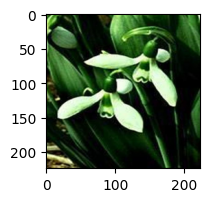

In [47]:
# Show a single image
plt.figure(figsize=(2,2))
plt.imshow(images[0])
plt.show()

In [19]:
# Scale the image data
images = images.astype('float32')/255.0

In [20]:
# One-hot Encode the Labels
classes_no = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, classes_no)

In [22]:
labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [23]:
# Split Images into Train and Test Images
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.20, random_state=42
)

In [24]:
train_images.shape, train_labels.shape

((1088, 224, 224, 3), (1088, 17))

In [25]:
test_images.shape, test_labels.shape

((272, 224, 224, 3), (272, 17))

In [26]:
# Split Train images into Train and Validation Images
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.20, random_state=42
)

In [27]:
train_images.shape, validation_images.shape

((870, 224, 224, 3), (218, 224, 224, 3))

In [28]:
train_labels.shape, validation_labels.shape

((870, 17), (218, 17))

In [29]:
# Make the Convolution Layers
layers = [
    # 1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), activation='relu', padding='valid', strides=(4,4), input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),
    
    # 2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),
    
    # 3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1)),
    tf.keras.layers.BatchNormalization(),
    
    # 4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1)),
    tf.keras.layers.BatchNormalization(),
    
    # 5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),
    
    # Flatten Layer
    tf.keras.layers.Flatten(),
    
    # 1st Dense Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    
    # 2nd Dense Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    
    # Output Layer
    tf.keras.layers.Dense(17, activation='softmax') 
]

model_clf = tf.keras.models.Sequential(layers)

In [30]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_19 (Bat  (None, 26, 26, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                      

In [31]:
# Compile The model
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']
model_clf.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [37]:
labels.shape

(1360, 17)

In [38]:
# Train the Model

# Callback Function
checkpoint = ModelCheckpoint(filepath='artifacts/alexnet.h5', save_best_only=True, save_weights_only=False)
history = model_clf.fit(images, labels, batch_size=64, epochs=10, callbacks=[checkpoint], validation_split=0.2, shuffle=True, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.9893 - acc: 0.7748 - val_loss: 3.2875 - val_acc: 0.4191
Epoch 2/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.5606 - acc: 0.8327 - val_loss: 1.9962 - val_acc: 0.5478
Epoch 3/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.3430 - acc: 0.8925 - val_loss: 2.2746 - val_acc: 0.4816
Epoch 4/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.2133 - acc: 0.9219 - val_loss: 2.0884 - val_acc: 0.4779
Epoch 5/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.1719 - acc: 0.9375 - val_loss: 1.8095 - val_acc: 0.5735
Epoch 6/10
1088/1088 [==============================] - 23s 21ms/sample - loss: 0.1641 - acc: 0.9439 - val_loss: 1.9903 - val_acc: 0.5147
Epoch 7/10
1088/1088 [==============================] - 24s 22ms/sample - loss: 0.0897 - acc: 0.9743 - val_loss: 1.2073 - val

In [39]:
history.params

{'batch_size': 64,
 'epochs': 10,
 'steps': None,
 'samples': 1088,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [40]:
pd.DataFrame(history.history)

,loss,acc,val_loss,val_acc
0,0.989322,0.774816,3.287453,0.419118
1,0.560618,0.832721,1.996151,0.547794
2,0.342992,0.892463,2.274605,0.481618
3,0.213291,0.921875,2.088423,0.477941
4,0.171882,0.937500,1.809499,0.573529
5,0.164059,0.943934,1.990341,0.514706
6,0.089730,0.974265,1.207263,0.676471
7,0.059881,0.983456,1.062326,0.735294
8,0.046690,0.987132,1.209349,0.720588
9,0.035281,0.988051,0.752950,0.830882


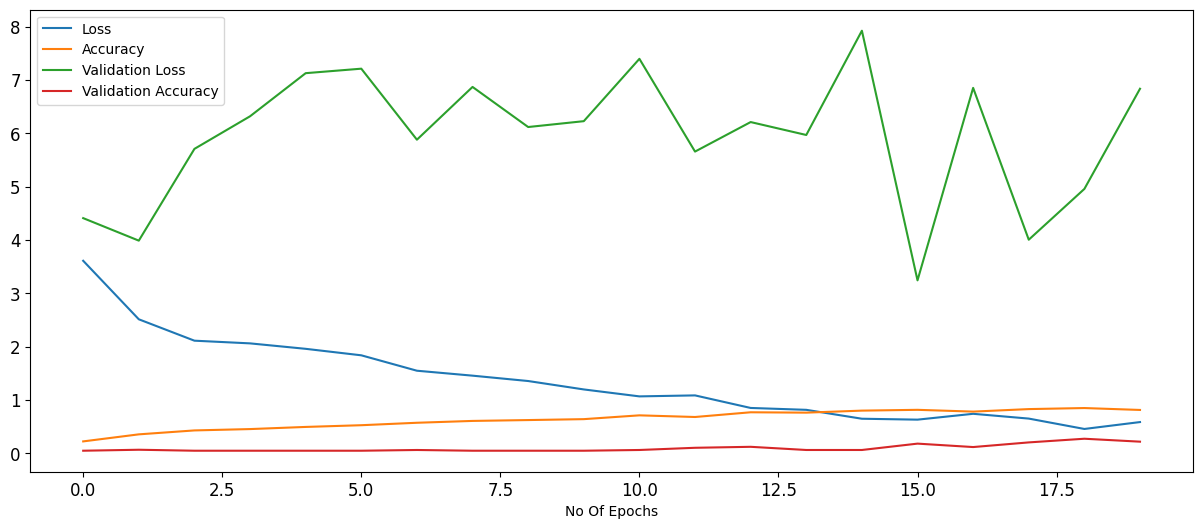

In [35]:
# Plot loss and accuracy history per epoch
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(history.history))
plt.xlabel("No Of Epochs")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Loss','Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

In [41]:
# Evaluate the Model
model_clf.evaluate(test_images, test_labels)

[0.5019293760552126, 0.8860294]

In [67]:
# Predict the model
actual_image = train_images[0]
actual_label = train_labels[0]
y_predict = model_clf.predict(np.expand_dims(actual_image, axis=0))
np.argmax(y_predict)

0

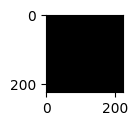

In [54]:
plt.figure(figsize=(1,1))
plt.imshow(actual_image)
plt.show()

In [26]:
y_predict = model_clf.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [28]:
# Now Use the Model

In [55]:
# Load the Model
model = load_model('artifacts/alexnet.h5')
alexnet_labels = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip', 'Orchid', 'Bellflower', 'Carnation', 'Lily', 'Poppy', 'Buttercup', 'Iris', 'Gladiolus', 'Marigold', 'Pansy', 'Snapdragon', 'Azalea', 'Violet']

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2023-08-21 14:51:42.277525: W tensorflow/c/c_api.cc:300] Operation '{name:'batch_normalization_21_1/beta/Assign' id:4286 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_21_1/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_21_1/beta, batch_normalization_21_1/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-08-21 14:51:42.865472: W tensorflow/c/c_api.cc:300] Operation '{name:'conv2d_18_1/bias/m/Assign' id:5168 op device:{requested: '', assigned: ''} def:{{{node conv2d_18_1/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=fa

In [35]:
## Image 01

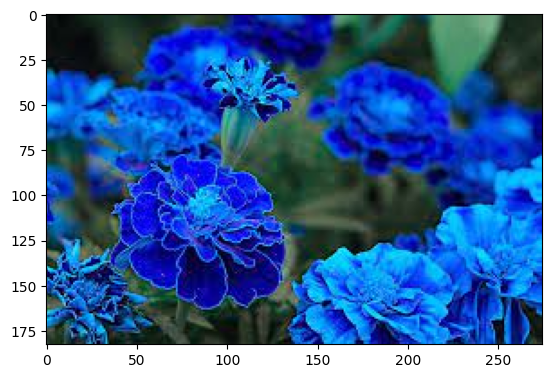

In [63]:
demo_img = cv2.imread('artifacts/marigold.jpeg')
plt.imshow(demo_img)
plt.show()

In [64]:
demo_img = cv2.resize(demo_img, (224,224))
demo_img = demo_img.astype('float32')/255
demo_img = np.expand_dims(demo_img, axis=0)

In [66]:
prediction = model.predict(demo_img)
predicted_class = np.argmax(prediction)
predicted_class

2